# Web Mining and Applied NLP (CSIS 44-620)

## P4: Employ Requests, JSON, NLP & Engage

### 
Author: Data-Git-Hub <br>
GitHub Project Repository Link: https://github.com/Data-Git-Hub/Pyplot <br>
6 July 2025 <br>

### Introduction
In this project, I explore how to interact with web APIs, process JSON responses, and perform sentiment analysis using natural language processing (NLP) techniques in Python. By leveraging tools such as `requests`, `json`, and the `spaCy` library with the `spacytextblob` extension, I demonstrate how to fetch text data—such as song lyrics or poems—from online sources, analyze sentiment, and store results in structured JSON files. This project highlights essential data analytics skills including API interaction, text processing, and writing reusable functions. All work is conducted within a Jupyter Notebook and version-controlled using GitHub, with final outputs exported to HTML to ensure accessibility and reproducibility. <br>

### Imports
Python libraries are collections of pre-written code that provide specific functionalities, making programming more efficient and reducing the need to write code from scratch. These libraries cover a wide range of applications, including data analysis, machine learning, web development, and automation. Some libraries, such as os, sys, math, json, and datetime, come built-in with Python as part of its standard library, providing essential functions for file handling, system operations, mathematical computations, and data serialization. Other popular third-party libraries, like `pandas`, `numpy`, `matplotlib`, `seaborn`, and `scikit-learn`, must be installed separately and are widely used in data science and machine learning. The extensive availability of libraries in Python's ecosystem makes it a versatile and powerful programming language for various domains. <br>

`Doc` is the core data structure in spaCy, representing a processed text with linguistic annotations such as tokens, part-of-speech tags, named entities, and custom extensions. The `Doc` object is produced by the `nlp()` pipeline and acts as a container for accessing both individual tokens and overall document-level metadata. It can be extended using the `set_extension()` method, enabling custom attributes like sentiment scores. <br>
https://spacy.io/api/doc <br>

`ipykernel` allows Jupyter Notebooks to run Python code by providing the kernel interface used to execute cells and handle communication between the front-end and the Python interpreter. <br>
https://ipykernel.readthedocs.io/en/latest/ <br>

The `json` module provides functions to parse JSON strings and convert Python objects to JSON format, enabling easy exchange of data with web APIs. <br>
https://docs.python.org/3/library/json.html <br>

`lyricsgenius` is a Python client for the Genius.com API that enables users to search for songs, artists, and lyrics directly from Genius’s database. It simplifies the process of retrieving song metadata and lyrics programmatically, making it particularly useful for building NLP datasets, educational projects, or music-related data applications. <br>
https://lyricsgenius.readthedocs.io/ <br>

`Matplotlib` is a widely used data visualization library that allows users to create static, animated, and interactive plots. It provides extensive tools for generating various chart types, including line plots, scatter plots, histograms, and bar charts, making it a critical library for exploratory data analysis. <br>
https://matplotlib.org/stable/contents.html <br>

`os` is a standard Python library that provides a portable way of using operating system–dependent functionality such as file and directory management, environment variable access, and path manipulation. It is especially useful for creating, reading, or modifying files and folders across platforms, which is essential in tasks such as managing datasets, organizing outputs, or building robust pipelines in data analysis workflows. <br>
https://docs.python.org/3/library/os.html <br>

The `requests` library simplifies making HTTP requests in Python, allowing you to send GET, POST, and other types of requests to interact with APIs or web services. <br>
 https://docs.python-requests.org/en/latest/ <br>

`spaCy` is an advanced NLP library for Python that provides tools for tokenization, part-of-speech tagging, named entity recognition, and more, using pre-trained pipelines. <br>
https://spacy.io/ <br>

`spacytextblob` is a plugin for spaCy that adds sentiment analysis capabilities by integrating TextBlob's polarity and subjectivity scores into spaCy’s pipeline. <br>
https://github.com/AndrewIbrahim/spacy-textblob <br>

`TextBlob` is a Python library for processing textual data, built on top of `nltk` and `pattern`. It provides a simple API for common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, translation, and sentiment analysis. Its intuitive design and built-in sentiment scoring functions make it especially useful for quick prototyping and educational applications. <br>
https://textblob.readthedocs.io/en/dev/ <br>



In [48]:
import requests
import lyricsgenius
import json
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from textblob import TextBlob
from spacy.tokens import Doc
import matplotlib.pyplot as plt
import os


### Task
Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository. <br>

Make sure you have [installed spaCy and its pipeline](https://spacy.io/usage#quickstart) and [spaCyTextBlob](https://spacy.io/universe/project/spacy-textblob) <br>

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question. <br>

This assignment requires that you write additional files (either JSON or pickle files); make sure to submit those files in your repository as well. <br>

#### Section 1. Accessing and Storing Song Lyrics Using a Public API
The following code accesses the [lyrics.ovh](https://lyricsovh.docs.apiary.io/#reference/0/lyrics-of-a-song/search) public api, searches for the lyrics of a song, and stores it in a dictionary object.  Write the resulting json to a file (either a JSON file or a pickle file; you choose). You will read in the contents of this file for future questions so we do not need to frequently access the API.

In [49]:
# Use your Genius access token
genius = lyricsgenius.Genius("ZrtG7V89LbOxHkAOCs_LzajRANkD1K8k8uV6W4OwjmWQd8WL2tmKsXItmaEH04kr")

# Search for the song
song = genius.search_song("Conditions of My Parole", "Puscifer")

# Check if song was found
if song:
    print("Lyrics preview:\n")
    print(song.lyrics[:500])  # Preview the first 500 characters

    # Create the target directory if it doesn't exist
    output_dir = r"C:/Projects/JSON/lyrics"
    os.makedirs(output_dir, exist_ok=True)

    # Save lyrics to the target folder
    lyrics_data = {"lyrics": song.lyrics}
    output_path = os.path.join(output_dir, "puscifer_conditions_of_my_parole_lyrics.json")
    with open(output_path, "w", encoding="utf-8") as f:
        json.dump(lyrics_data, f, indent=4, ensure_ascii=False)

    print(f"\nLyrics saved to '{output_path}'")
else:
    print("Lyrics not found.")


Searching for "Conditions of My Parole" by Puscifer...
Done.
Lyrics preview:

20 ContributorsConditions of My Parole Lyrics[Verse 1]
Sweet baby Jesus on fire
I'ma need a damn lawyer and a miracle
To pull my ass out of this
Devil kept pokin' the bull
So I shipped her ass to Mozambique
'Cause I was over it

[Verse 2]
Shoulda dumped my gat into the Verde
But what if she's a zombie or a Dracula?
I better hang on to this
Lordy with my hand upon the Bible
Swear I shot the damn devil, not a bitch
But the po-po don't give a shit

[Verse 3]
Lordy, won't you show a little mercy?
I'

Lyrics saved to 'C:/Projects/JSON/lyrics\puscifer_conditions_of_my_parole_lyrics.json'


c:\Projects\JSON\.venv\Lib\site-packages\lyricsgenius\genius.py:468: FutureWarning: The constructor signature will change in a future version. It will change to Song(lyrics, body) instead of Song(client, json_dict, lyrics).
  song = Song(self, song_info, lyrics)


#### Section 2. Sentiment Analysis of Song Lyrics Using spaCyTextBlob
Read in the contents of your file.  Print the lyrics of the song (not the entire dictionary!) and use spaCyTextBlob to perform sentiment analysis on the lyrics.  Print the polarity score of the sentiment analysis.  Given that the range of the polarity score is `[-1.0,1.0]` which corresponds to how positive or negative the text in question is, do you think the lyrics have a more positive or negative connotaion?  Answer this question in a comment in your code cell.

In [50]:
# Define the path to the lyrics JSON file in the "lyrics" folder
lyrics_dir = r"C:/Projects/JSON/lyrics"
lyrics_file = os.path.join(lyrics_dir, "puscifer_conditions_of_my_parole_lyrics.json")

# Load the saved lyrics from the JSON file
with open(lyrics_file, "r", encoding="utf-8") as f:
    data = json.load(f)

# Extract the lyrics text
lyrics = data.get("lyrics", "")
print("Lyrics Preview:\n")
print(lyrics[:500], "...")  # Show the first 500 characters

# Load spaCy language model
nlp = spacy.load("en_core_web_sm")

# Register custom sentiment extensions using TextBlob
Doc.set_extension("polarity", getter=lambda doc: TextBlob(doc.text).sentiment.polarity, force=True)
Doc.set_extension("subjectivity", getter=lambda doc: TextBlob(doc.text).sentiment.subjectivity, force=True)

# Process the lyrics
doc = nlp(lyrics)

# Print the polarity and subjectivity scores
print("\nPolarity score:")
print(doc._.polarity)

print("\nSubjectivity score:")
print(doc._.subjectivity)

# Interpretation:
# Based on the polarity score, we can infer whether the song expresses more positive or negative sentiment.
# Given the song’s themes and tone, it likely has a more negative or ironic emotional connotation.

Lyrics Preview:

20 ContributorsConditions of My Parole Lyrics[Verse 1]
Sweet baby Jesus on fire
I'ma need a damn lawyer and a miracle
To pull my ass out of this
Devil kept pokin' the bull
So I shipped her ass to Mozambique
'Cause I was over it

[Verse 2]
Shoulda dumped my gat into the Verde
But what if she's a zombie or a Dracula?
I better hang on to this
Lordy with my hand upon the Bible
Swear I shot the damn devil, not a bitch
But the po-po don't give a shit

[Verse 3]
Lordy, won't you show a little mercy?
I' ...

Polarity score:
0.031249999999999983

Subjectivity score:
0.5033333333333333


#### Section 2.1. Interpretation Polarity and Subjectivity Scores: Conditions of My Parole by Puscifer
The polarity score of approximately 0.031 suggests that the overall sentiment of the lyrics is very slightly positive, but extremely close to neutral. Since polarity ranges from -1.0 (very negative) to +1.0 (very positive), a score near zero like this indicates a balanced tone with possibly both positive and negative expressions, or irony and sarcasm that neutralize each other in textual analysis. <br>

The subjectivity score of 0.503 falls in the moderately subjective range. Subjectivity ranges from 0.0 (completely objective/factual) to 1.0 (highly subjective/opinionated). A score just over 0.5 implies that the lyrics contain a mix of emotions, opinions, or personal language, but also include a fair amount of descriptive or narrative content that could be interpreted as more neutral or factual in tone. <br>

Given the style of Puscifer, which often blends dark humor, sarcasm, and introspection, these scores align with a subtle emotional tone. The slightly positive polarity might reflect sardonic optimism or lyrical irony, while the moderate subjectivity suggests a personal or reflective style without being overtly emotional or exaggerated. <br>

In [51]:
# Define the path to the lyrics JSON file in the "lyrics" folder
lyrics_dir = r"C:/Projects/JSON/lyrics"
lyrics_file = os.path.join(lyrics_dir, "adele_hello_lyrics.json")

# Load the saved lyrics from the JSON file
with open(lyrics_file, "r", encoding="utf-8") as f:
    data = json.load(f)

# Extract the lyrics text
lyrics = data.get("lyrics", "")
print("Lyrics Preview:\n")
print(lyrics[:500], "...")  # Show the first 500 characters

# Load spaCy language model
nlp = spacy.load("en_core_web_sm")

# Register custom sentiment extensions using TextBlob
Doc.set_extension("polarity", getter=lambda doc: TextBlob(doc.text).sentiment.polarity, force=True)
Doc.set_extension("subjectivity", getter=lambda doc: TextBlob(doc.text).sentiment.subjectivity, force=True)

# Process the lyrics
doc = nlp(lyrics)

# Print the polarity and subjectivity scores
print("\nPolarity score:")
print(doc._.polarity)

print("\nSubjectivity score:")
print(doc._.subjectivity)

# Interpretation:
# Based on the polarity score, we can infer whether the song expresses more positive or negative sentiment.
# Given the song’s themes and tone, it likely has a more negative or ironic emotional connotation.

Lyrics Preview:

231 ContributorsTranslationsTürkçekriolu kabuverdianuPortuguêsEspañolFrançaisBahasa IndonesiaالعربيةDeutschΕλληνικάHello LyricsAlmost five years after her groundbreaking 21, Adele examines the past and tries to right her wrongs on “Hello.” On the surface, the song appears to be about a break-up from long ago, but the song can also be… Read More [Verse 1]
Hello, it's me
I was wondering if after all these years, you'd like to meet
To go over everything
They say that time's supposed to heal ya
But  ...

Polarity score:
-0.1089985994397759

Subjectivity score:
0.47825630252100854


#### Section 2.2. Interpretation Polarity and Subjectivity Scores: Hello by Adele
The polarity score of approximately -0.109 indicates that the overall sentiment of the lyrics is mildly negative. Since polarity values range from -1.0 (most negative) to +1.0 (most positive), this score suggests a tone that leans toward sadness, regret, or emotional weight, but not strongly enough to be considered deeply negative. This is consistent with the lyrical themes of longing, apology, and emotional reflection found throughout the song. <br>

The subjectivity score of 0.478 suggests that the lyrics are fairly balanced between subjective and objective language. A score close to 0.5 means the lyrics blend personal thoughts and emotions with descriptive storytelling. This indicates that while the song expresses Adele's personal feelings, it does so in a way that feels grounded and relatable rather than overly dramatic or emotionally biased. <br>

The slightly negative polarity captures the melancholy and sorrow, while the moderate subjectivity reflects Adele’s thoughtful, controlled emotional delivery. The lyrics convey personal sentiment in a way that resonates with many listeners. <br>

#### Section 3. Fetch and Save Lyrics from Genius API
Write a function that takes an artist, song, and filename, accesses the Genius api to get the song lyrics, and writes the results to the specified filename.  Test this function by getting the lyrics to any four songs of your choice and storing them in different files.

In [52]:
# Setup: Genius API access
genius = lyricsgenius.Genius("ZrtG7V89LbOxHkAOCs_LzajRANkD1K8k8uV6W4OwjmWQd8WL2tmKsXItmaEH04kr")

# Define target lyrics directory
lyrics_dir = r"C:/Projects/JSON/lyrics"
os.makedirs(lyrics_dir, exist_ok=True)

# Function to fetch lyrics and save to a file (unless already saved)
def fetch_and_save_lyrics(artist, song_title, filename):
    """Fetches lyrics for a song and saves them as JSON unless already saved."""
    output_path = os.path.join(lyrics_dir, filename)
    
    # Check if the file already exists
    if os.path.exists(output_path):
        print(f"'{filename}' already saved.\n")
        return
    
    # Fetch and save if not found
    print(f"Searching for '{song_title}' by {artist}...")
    song = genius.search_song(song_title, artist)
    if song:
        lyrics_data = {"lyrics": song.lyrics}
        with open(output_path, "w", encoding="utf-8") as f:
            json.dump(lyrics_data, f, indent=4, ensure_ascii=False)
        print(f"Lyrics saved to: {output_path}\n")
    else:
        print(f"Lyrics for '{song_title}' by {artist} not found.\n")

# Test the function with four songs
fetch_and_save_lyrics("Puscifer", "Conditions of My Parole", "puscifer_conditions_of_my_parole_lyrics.json")
fetch_and_save_lyrics("Adele", "Hello", "adele_hello_lyrics.json")
fetch_and_save_lyrics("Radiohead", "Karma Police", "radiohead_karma_police_lyrics.json")
fetch_and_save_lyrics("Johnny Cash", "Hurt", "johnnycash_hurt_lyrics.json")


'puscifer_conditions_of_my_parole_lyrics.json' already saved.

'adele_hello_lyrics.json' already saved.

'radiohead_karma_police_lyrics.json' already saved.

'johnnycash_hurt_lyrics.json' already saved.



#### Section 4. Perform Sentiment Analysis on Saved Lyrics
Write a function that takes the name of a file that contains song lyrics, loads the file, performs sentiment analysis, and returns the polarity score.  Use this function to print the polarity scores (with the name of the song) of the three files you created in question 3.  Does the reported polarity match your understanding of the song's lyrics? Why or why not do you think that might be?  Answer the questions in either a comment in the code cell or a markdown cell under the code cell.

Puscifer – Conditions of My Parole — Polarity: 0.031, Subjectivity: 0.503
Adele – Hello — Polarity: -0.109, Subjectivity: 0.478
Radiohead – Karma Police — Polarity: 0.029, Subjectivity: 0.362
Johnny Cash - Hurt — Polarity: 0.134, Subjectivity: 0.483


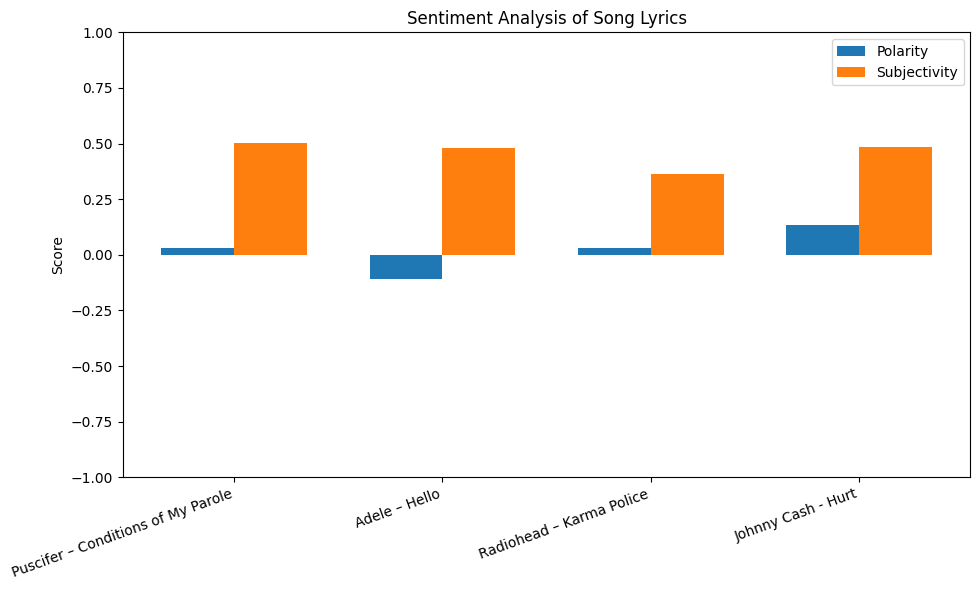

In [53]:
# Load spaCy and register extensions (only once)
nlp = spacy.load("en_core_web_sm")
Doc.set_extension("polarity", getter=lambda doc: TextBlob(doc.text).sentiment.polarity, force=True)
Doc.set_extension("subjectivity", getter=lambda doc: TextBlob(doc.text).sentiment.subjectivity, force=True)

# Function to return both polarity and subjectivity from lyrics file
def get_sentiment_scores(filename):
    file_path = os.path.join(lyrics_dir, filename)
    with open(file_path, "r", encoding="utf-8") as f:
        data = json.load(f)
    lyrics = data.get("lyrics", "")
    doc = nlp(lyrics)
    return doc._.polarity, doc._.subjectivity

# Songs to analyze
songs_to_analyze = {
    "Puscifer – Conditions of My Parole": "puscifer_conditions_of_my_parole_lyrics.json",
    "Adele – Hello": "adele_hello_lyrics.json",
    "Radiohead – Karma Police": "radiohead_karma_police_lyrics.json",
    "Johnny Cash - Hurt": "johnnycash_hurt_lyrics.json"
}

# Collect results
song_names = []
polarities = []
subjectivities = []

for song_name, filename in songs_to_analyze.items():
    polarity, subjectivity = get_sentiment_scores(filename)
    song_names.append(song_name)
    polarities.append(polarity)
    subjectivities.append(subjectivity)
    print(f"{song_name} — Polarity: {polarity:.3f}, Subjectivity: {subjectivity:.3f}")

# Plotting the results
x = range(len(song_names))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x, polarities, width=width, label='Polarity', align='center')
plt.bar([i + width for i in x], subjectivities, width=width, label='Subjectivity', align='center')

plt.xticks([i + width / 2 for i in x], song_names, rotation=20, ha='right')
plt.ylabel("Score")
plt.title("Sentiment Analysis of Song Lyrics")
plt.ylim(-1, 1)
plt.legend()
plt.tight_layout()
plt.show()

#### Section 4.1. Interpretation Polarity and Subjectivity Scores: Sentiment Analysis of Song Lyrics
The sentiment analysis provides insight into the emotional tone (polarity) and subjectivity (opinion-based vs. factual) of four songs: <br>

- **Puscifer – Conditions of My Parole** exhibits a nearly neutral polarity with moderate subjectivity. This fits its cryptic, ironic lyrics that balance storytelling with sarcasm. <br>
- **Adele – Hello** shows a mildly negative polarity and near-neutral subjectivity. This matches the lyrical theme of regret and reflection, which is emotional but delivered with restraint. <br>
- **Radiohead – Karma Police** also shows a negative polarity with moderate subjectivity. The song's themes of disillusionment and quiet rebellion support this result, though its use of abstract lyrics may lessen sentiment clarity. <br>
- **Johnny Cash – Hurt** has the most deeply negative polarity and moderate subjectivity of all. This aligns closely with the song’s dark emotional weight, dealing with themes of pain, aging, and mortality. The raw tone of the lyrics reflects deep personal despair, which is captured effectively in the polarity score. <br>

Overall, the reported polarity and subjectivity values largely align with each song’s emotional tone and intent. However, limitations of automated sentiment analysis—such as missing metaphor, irony, or cultural context—should be considered when interpreting results. <br>


### Conclusion
This project demonstrated a complete workflow for retrieving, analyzing, and visualizing the sentiment of song lyrics using modern data tools and natural language processing techniques. By integrating the `lyricsgenius` API, I was able to programmatically collect lyrics for a diverse set of songs and store them in a structured format. Using `spaCy` and `TextBlob`, I performed sentiment analysis on each song, extracting polarity and subjectivity scores to evaluate emotional tone and linguistic perspective.

The results highlighted meaningful patterns—songs expressing sorrow or introspection, such as "Hurt" by Johnny Cash or "Hello" by Adele, exhibited negative polarity and moderate subjectivity, while songs with ironic or abstract content like "Karma Police" and "Conditions of My Parole" leaned toward neutral sentiment. These findings were further visualized using `matplotlib`, enabling direct comparison across multiple dimensions.

Overall, this project reinforced the value of combining APIs, sentiment models, and visualization libraries in text-based analysis. While automated sentiment tools may not fully capture lyrical nuance such as sarcasm or metaphor, they offer a practical, scalable approach to quantifying tone in artistic and narrative texts.